# Análise exploratória de dados
Dados: https://www.kaggle.com/datasets/parulpandey/forbes-highest-paid-athletes-19902019
## Forbes Highest Paid Athletes 1990-2020
Lista completa dos atletas mais bem pagos do mundo desde a primeira lista publicada pela Forbes em 1990. Em 2002, alteraram o período abrangido pelo relatório, de ano civil completo para Junho-Junho, e consequentemente, não existem registos para 2001.

### Importação das libs

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

### Carregamento de dados

In [4]:
dt = pd.read_csv('../../data/raw/datarich.csv')
dt.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


## 1. Descrição dos dados

In [16]:
#Informações basicas
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [36]:
#variáveis e seus tipos
dicionario = dt.columns.to_frame(name="Variaveis").reset_index(drop=True)
dicionario["Significado"] = [
    "Serial Numbers",
    "Nome",
    "Nacionalidade",
    "Rank Atual",
    "Rank previsão",
    "Esporte",
    "Ano",
    "Ganhos ($ milhões)"]
dicionario["Significado"] = [
    "Números de série",
    "Nome",
    "Nacionalidade",
    "Rank Atual",
    "Rank Anterior",
    "Esporte",
    "Ano",
    "Ganhos ($ milhões)"]
#Tipos em Quantitativos e Qualitativos
dicionario["Tipo"] = [ 
    "Continuo",
    "Nominal",
    "Nominal",
    "Ordinal",
    "Ordinal",
    "Nominal",
    "Continuo",
    "Continuo"]
dicionario

,Variaveis,Significado,Tipo
0,S.NO,Números de série,Continuo
1,Name,Nome,Nominal
2,Nationality,Nacionalidade,Nominal
3,Current Rank,Rank Atual,Ordinal
4,Previous Year Rank,Rank Anterior,Ordinal
5,Sport,Esporte,Nominal
6,Year,Ano,Continuo
7,earnings ($ million),Ganhos ($ milhões),Continuo


In [20]:
#Quantas linhas e colunas?
linhas = dt.shape[0]
colunas = dt.shape[1]
print("O data frame possui ",linhas," linhas e ",colunas," colunas.")

O data frame possui  301  linhas e  8  colunas.


In [24]:
#Quantidade de valores faltantes?
nulos = dt.isnull().sum().sum()
print("A quantidade total de nulos no data frame é:",nulos)

A quantidade total de nulos no data frame é: 24


## 2. Perguntas de partida e hipóteses

1. Quais os dez maiores valores ganhos do Atletas mais bem pago durante 1990 a 2020?
2. Qual o menor valor ganho do data frame?
3. Qual pais(nacionalidade) que tem mais atletas mais bem pagos?
4. Quais os atletas brasileiros que aparecem no data?
5. Quais os top 1 de cada ano?
6. Quais atletas apareceram mais vezes no top 1?
7. Qual atleta ficou mais anos consecutivos no top 1?
8. Qual esporte tem mais atletas em 1990?
9. Qual esporte tem mais atletas em 2020?


## 3. Insights

1. Quais os dez maiores valores ganhos do Atletas mais bem pago durante 1990 a 2020?

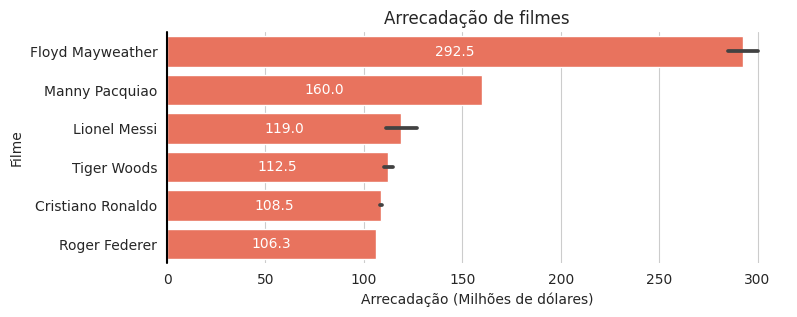

In [65]:
#ordenado em ganhos maiores>menores valores e mostrando apenas os 10 primeiros
top10 = dt.sort_values(by='earnings ($ million)',ascending=False).head(10)
# UTILIZE LINHAS VERTICAIS
sns.set_style("whitegrid")
# UTILIZE UMA MESMA COR PARA AS BARRAS E UTILIZE BARRAS HORIZONTAIS
plt.figure(figsize=(8, 3))
ax = sns.barplot(data=top10, x='earnings ($ million)', y='Name', color='tomato')
# ADICIONE VALORES NAS BARRAS
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='white'
)

# MELHORE O TITULO E OS LABELS DOS EIXOS
plt.xlabel('Arrecadação (Milhões de dólares)')
plt.ylabel('Filme')
plt.title('Arrecadação de filmes')
# Adicione uma linha vertical na origem e remova as bordas
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)
plt.show()

2. Qual o menor valor ganho do data?

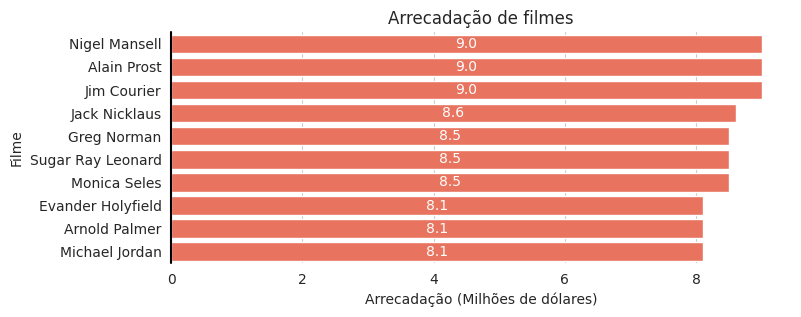

In [119]:
menores10 = dt.sort_values(by='earnings ($ million)',ascending=False).tail(10)
# UTILIZE LINHAS VERTICAIS
sns.set_style("whitegrid")
# UTILIZE UMA MESMA COR PARA AS BARRAS E UTILIZE BARRAS HORIZONTAIS
plt.figure(figsize=(8, 3))
ax = sns.barplot(data=menores10, x='earnings ($ million)', y='Name', color='tomato')
# ADICIONE VALORES NAS BARRAS
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='white'
)

# MELHORE O TITULO E OS LABELS DOS EIXOS
plt.xlabel('Arrecadação (Milhões de dólares)')
plt.ylabel('Filme')
plt.title('Arrecadação de filmes')
# Adicione uma linha vertical na origem e remova as bordas
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)
plt.show()

3. Qual pais(nacionalidade) que tem mais atletas mais bem pagos?

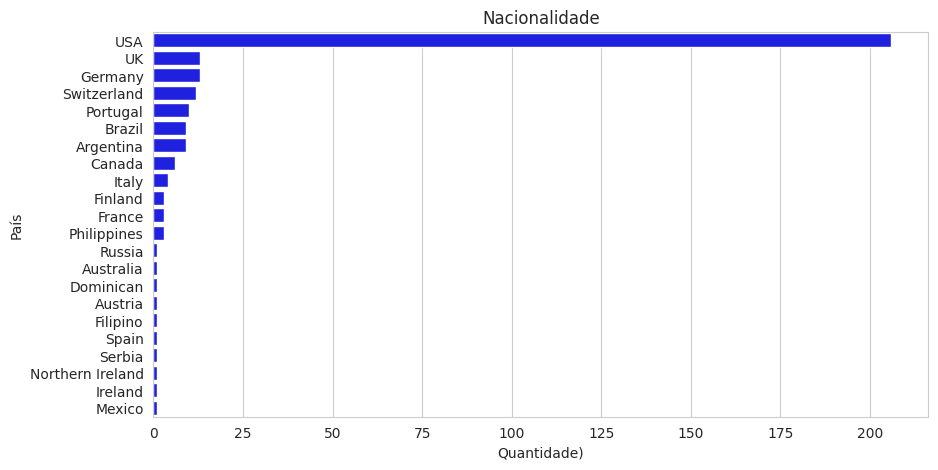

In [113]:
# UTILIZE LINHAS VERTICAIS
sns.set_style("whitegrid")
# UTILIZE UMA MESMA COR PARA AS BARRAS E UTILIZE BARRAS HORIZONTAIS
plt.figure(figsize=(10, 5))
ax = sns.barplot(y=list(dt["Nationality"].value_counts().keys()),x=list(dt["Nationality"].value_counts()), color='blue')

# MELHORE O TITULO E OS LABELS DOS EIXOS
plt.xlabel('Quantidade)')
plt.ylabel('País')
plt.title('Nacionalidade')

plt.show()

4. Quais os atletas brasileiros que aparecem no data?

In [24]:
dt[dt["Nationality"]=="Brazil"]

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
14,15,Ayrton Senna,Brazil,5,4,auto racing,1991,13.0
22,23,Ayrton Senna,Brazil,3,5,Auto Racing,1992,22.0
32,33,Ayrton Senna,Brazil,3,3,Auto racing,1993,18.5
169,170,Ronaldinho,Brazil,9,>10,soccer,2007,31.0
178,179,Ronaldinho,Brazil,8,9,soccer,2008,37.0
275,276,Neymar,Brazil,5,18,Soccer,2018,90.0
283,284,Neymar,Brazil,3,5,Soccer,2019,105.0
294,295,Neymar,Brazil,4,3,Soccer,2020,95.5


5. Quais os top 1 de cada ano?

In [117]:
dt[dt["Current Rank"]==1]

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
10,11,Evander Holyfield,USA,1,8,boxing,1991,60.5
20,21,Michael Jordan,USA,1,3,Basketball,1992,35.9
30,31,Michael Jordan,USA,1,1,Basketball,1993,36.0
40,41,Michael Jordan,USA,1,1,Basketball,1994,30.0
50,51,Michael Jordan,USA,1,1,basketball,1995,43.9
60,61,Mike Tyson,USA,1,2,Boxing,1996,75.0
70,71,Michael Jordan,USA,1,2,Basketball,1997,78.3
80,81,Michael Jordan,USA,1,NaN,Basketball,1998,69.0
90,91,Michael Schumacher,Germany,1,2,Auto Racing,1999,49.0


6.Quais atletas apareceram mais vezes no top 1?

7.Qual atleta ficou mais anos consecutivos no top 1?

8.Qual esporte tem mais atletas em 1990?

9.Qual esporte tem mais atletas em 2020?